# Project: TMDB Movie Data Analysis (From Kaggle  https://www.kaggle.com/tmdb/tmdb-movie-metadata)

# Table Of Content

- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusion




# Introduction
### In this project i would be analysing data associated with movies released by tmdb, in particular i would be finding answers to  questions trends about the following:
- which genres are most popular from year to year?
- what kinds of properties are associated with movies that have high revenues?
- Which effect does each properties have on the popularity?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Wrangling

## General Properties

In [2]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_movies.shape

(10866, 21)

In [4]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# Check for missing values
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df_movies.columns = df_movies.columns.str.strip()

In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# Drop data i would not be making use of
df_movies.drop(['cast','tagline','overview','id','imdb_id','homepage','keywords'], axis = 1, inplace= True)

In [9]:
#Popularity is my dependent variable, while runtime,release_year,vote_count are my independent variable
df_movies.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

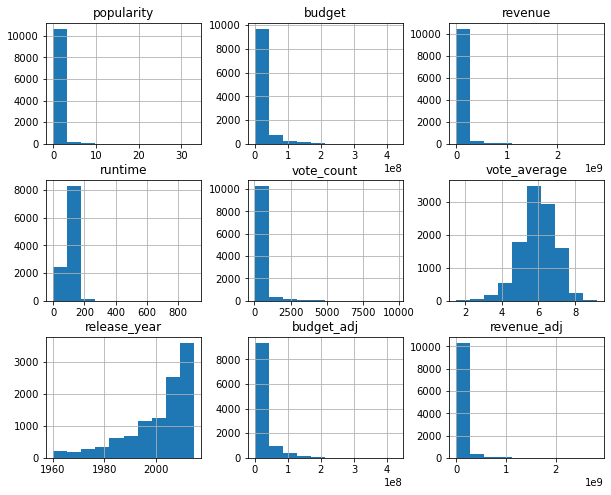

In [11]:
df_movies.hist(figsize=(10,8))

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

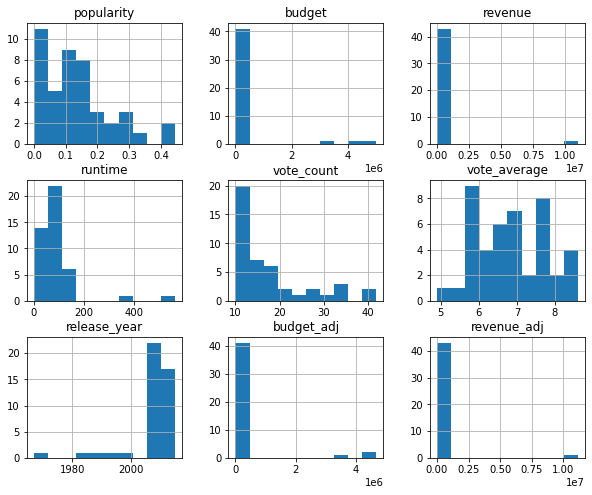

In [12]:
df_movies[df_movies.director.isnull()].hist(figsize= (10,8))

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

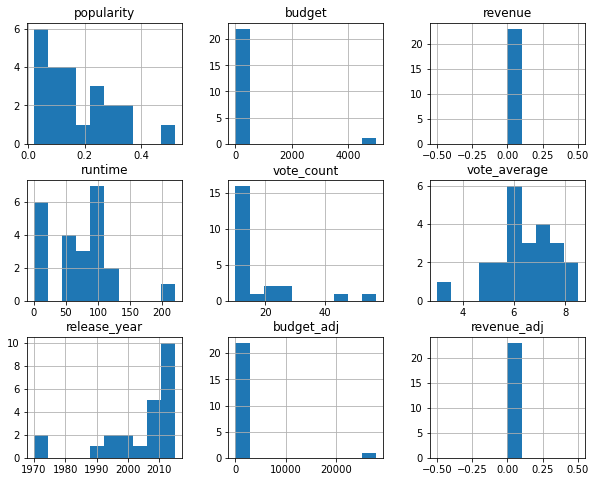

In [13]:
df_movies[df_movies.genres.isnull()].hist(figsize= (10,8))

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

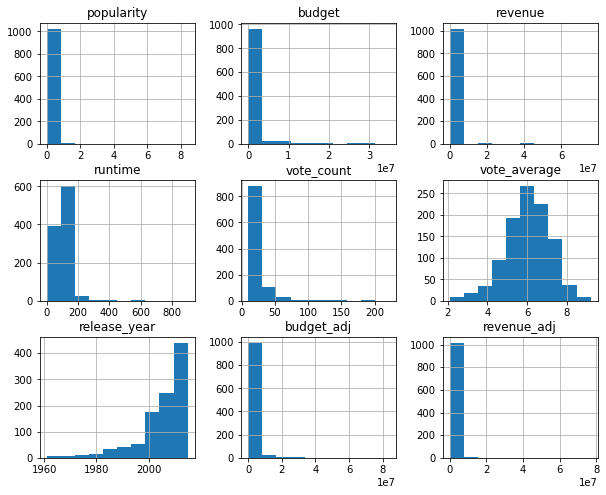

In [14]:
df_movies[df_movies.production_companies.isnull()].hist(figsize= (10,8))

In [15]:
# this cant work because the missing values are non-numeric
df_movies.fillna(df_movies.mean(), inplace = True)

C:\Users\User\AppData\Local\Temp/ipykernel_388/3503168608.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_movies.fillna(df_movies.mean(), inplace = True)


In [16]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [17]:
df_movies.dropna(inplace=True)

In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   budget                9807 non-null   int64  
 2   revenue               9807 non-null   int64  
 3   original_title        9807 non-null   object 
 4   director              9807 non-null   object 
 5   runtime               9807 non-null   int64  
 6   genres                9807 non-null   object 
 7   production_companies  9807 non-null   object 
 8   release_date          9807 non-null   object 
 9   vote_count            9807 non-null   int64  
 10  vote_average          9807 non-null   float64
 11  release_year          9807 non-null   int64  
 12  budget_adj            9807 non-null   float64
 13  revenue_adj           9807 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [19]:
df_movies.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Cleaning
## The data has been cleaned,the missing values has be extracted and there are no duplicate values.
## The data that would not be needed has be dropped,therefore EDA can commence

# Exploratory Data Analysis
## Research Question 1
### Which genres are most popular from year to year?

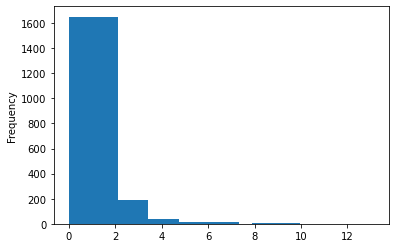

In [20]:
df_movies.groupby('genres').popularity.mean().plot(kind= 'hist', width = 2.1);

In [21]:
df_movies.genres.value_counts()

Drama                                     638
Comedy                                    615
Drama|Romance                             272
Comedy|Drama                              255
Comedy|Romance                            248
                                         ... 
Action|Romance|Thriller                     1
Comedy|Horror|Thriller|Mystery              1
Adventure|TV Movie                          1
Thriller|Horror|Romance                     1
Mystery|Science Fiction|Thriller|Drama      1
Name: genres, Length: 1921, dtype: int64

In [22]:
df_movies.groupby('genres')['release_year'].value_counts()

genres                       release_year
Action                       2014            9
                             2015            7
                             2003            5
                             2005            5
                             2011            5
                                            ..
Western|Drama|Crime|Romance  2013            1
Western|History              1980            1
Western|History|War          2004            1
Western|Horror|Thriller      1999            1
Western|Thriller             2013            1
Name: release_year, Length: 5697, dtype: int64

<AxesSubplot:ylabel='Frequency'>

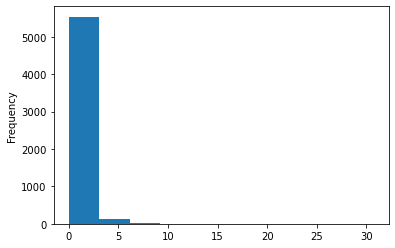

In [23]:
df_movies.groupby(['genres', 'release_year']).popularity.mean().plot(kind='hist')

## Research Question 2
### Which effect does each properties have on the popularity?
### 1. I made use of scattered plot to check if a relationship or correlation exists between the independent and dependent variables
### 2. I have one independent variable(popularity) and 3 dependent variable (runtime, vote_count, release_year)

#### From the scattered plot below, movies with lower runtime are more popuplar

Text(0.5, 1.0, 'Movie Data')

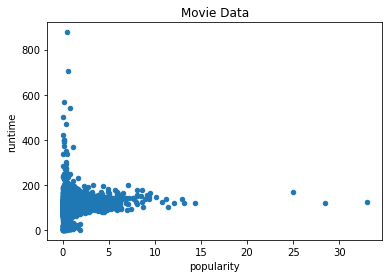

In [24]:
df_movies.plot(x='popularity', y = 'runtime', kind = 'scatter')
plt.xlabel('popularity')
plt.ylabel('runtime')
plt.title('Movie Data')

From the scattered plot below,theres a positivve linear association between release_year and popularity
the lower the release_year,the lower the popularity and vis-versa
i.e movies released between 2000-2010 and above has a higher popularity

Text(0.5, 1.0, 'Movie Data')

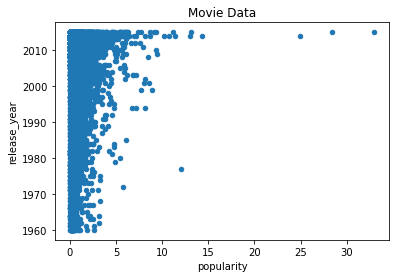

In [25]:
df_movies.plot(x="popularity", y="release_year", kind="scatter")
plt.xlabel('popularity')
plt.ylabel('release_year')
plt.title('Movie Data')

From the plot below,theres a positivthe lower the popularity,the lower the vote_count an vis-versa

Text(0.5, 1.0, 'Movie Data')

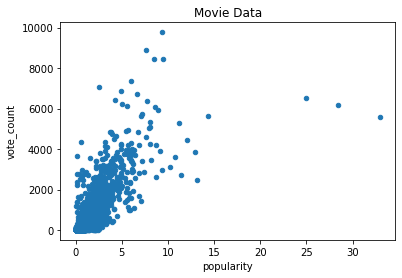

In [26]:
df_movies.plot(x="popularity", y="vote_count", kind="scatter")
plt.xlabel('popularity')
plt.ylabel('vote_count')
plt.title('Movie Data')

From the plot below, less popularity generated lower revenue

Text(0.5, 1.0, 'Movie Data')

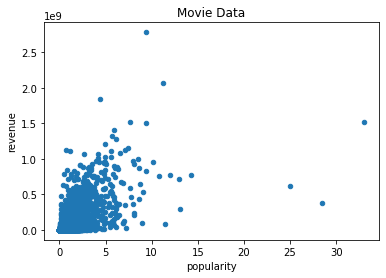

In [27]:
df_movies.plot(x="popularity", y="revenue", kind="scatter")
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title('Movie Data')


## Research Question 3
### What kinds of properties are associated with movies that have high revenues?
###  I made use of bar chart because i want to display comparison between two variables and also because i am dealing with revenue

In [34]:
df_movies.revenue.mean()

44073453.61639645

Text(0.5, 1.0, 'Movie Data')

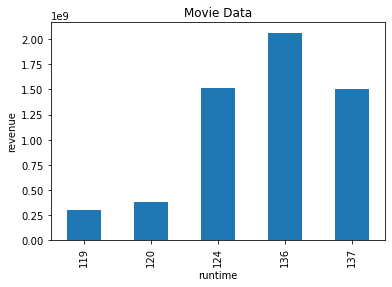

In [35]:
df_movies.head().groupby('runtime').revenue.mean().plot(kind= 'bar');
plt.xlabel('runtime')
plt.ylabel('revenue')
plt.title('Movie Data')

In [30]:
df_movies.groupby('runtime')['revenue'].value_counts()

runtime  revenue  
0        0            13
2        0             2
3        0             6
4        0            15
5        0            16
                      ..
500      0             1
540      0             1
566      0             1
705      125000000     1
877      0             1
Name: revenue, Length: 4955, dtype: int64

Text(0.5, 1.0, 'Movie Data')

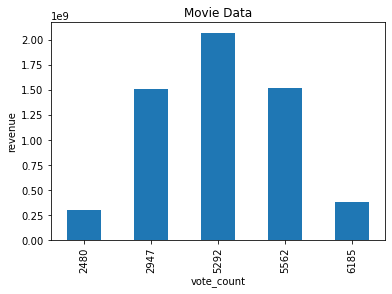

In [38]:
df_movies.head().groupby('vote_count').revenue.mean().plot(kind= 'bar');
plt.xlabel('vote_count')
plt.ylabel('revenue')
plt.title('Movie Data')

In [32]:
df_movies.groupby('vote_count')['revenue'].value_counts()

vote_count  revenue   
10          0             338
            9               1
            5980            1
            22270           1
            44872           1
                         ... 
7375        425368238       1
8432        1001921825      1
8458        2781505847      1
8903        1519557910      1
9767        825500000       1
Name: revenue, Length: 5049, dtype: int64

Text(0.5, 1.0, 'Movie Data')

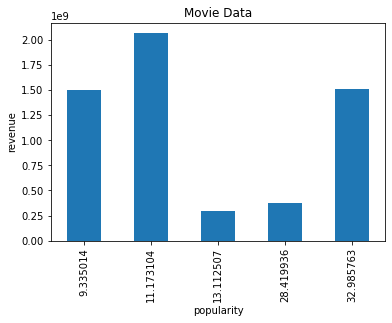

In [37]:
df_movies.head().groupby('popularity').revenue.mean().plot(kind= 'bar');
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title('Movie Data')

In [51]:
df_movies.groupby('popularity')['revenue'].value_counts()

popularity  revenue   
0.000188    0             1
0.000620    0             1
0.000973    0             1
0.001115    0             1
0.001317    0             1
                         ..
13.112507   295238201     1
14.311205   773312399     1
24.949134   621752480     1
28.419936   378436354     1
32.985763   1513528810    1
Name: revenue, Length: 9789, dtype: int64

Text(0.5, 1.0, 'Movie Data')

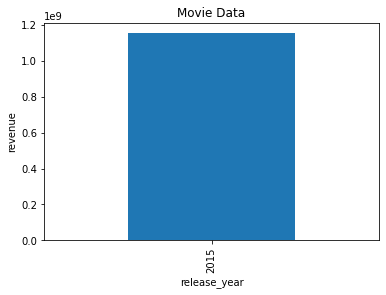

In [36]:
df_movies.head().groupby('release_year').revenue.mean().plot(kind= 'bar');
plt.xlabel('release_year')
plt.ylabel('revenue')
plt.title('Movie Data')

In [52]:
df_movies.groupby('release_year')['revenue'].value_counts()

release_year  revenue   
1960          0             25
              4905000        1
              6000000        1
              7100000        1
              10000000       1
                            ..
2015          1156730962     1
              1405035767     1
              1506249360     1
              1513528810     1
              2068178225     1
Name: revenue, Length: 4799, dtype: int64

# Conclusions
## Summary
- The goal of this analysis is to check for correlation between variables,compare and analyze the effects the variables has on the each other.
- The data was cleaned

- The folllowing questions were answered in the analysis:

   1. which genres are most popular from year to year?
          Answer: The genres that are most popular from year to year are; Action(year-2003, 2005,2011, 2014, 2015)
   2. what kinds of properties are associated with movies that have high revenues?
          Answer: The properties associated with the movies that have high revenue are movies released from year 2000 and above, movies with vote_count above 7000, lastly movies with runtime above 130.
   3. Which effect does each properties have on the popularity?
   
## LIMITATIONS
- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
- There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
- Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.